# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [274]:
# Import your libraries:
import pandas as pd
from sklearn.datasets import load_diabetes

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [275]:
# Your code here:
diabetes = load_diabetes()
diabetes.target[:3]

diabetes.data.shape


(442, 10)

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [276]:
# Your code here:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [277]:
# Your code here:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [278]:
# Enter your answer here:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [279]:
diabetes['data'].shape

(442, 10)

In [280]:
diabetes['target'].shape

(442,)

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [281]:
# Your code here:.
type(diabetes['target'][0])

numpy.float64

# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:

```
y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
```

...where:

- X1-Xn: data 
- β0: intercept 
- β1-βn: coefficients 
- ϵ: error (cannot explained by model)
- y: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [282]:
# Your code here:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [283]:
# Your code here:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [284]:
# Your code here:

diabetes_data_train, diabetes_data_test,  diabetes_target_train, diabetes_target_test=  train_test_split(diabetes['data'],diabetes['target'] ,test_size= 0.2, random_state=42)


Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [285]:
# Your code here:
diabetes_model = diabetes_model.fit(diabetes_data_train, diabetes_target_train)


In [286]:
#print intercept value
print(diabetes_model.intercept_)

151.34560453985995


In [287]:
#print regression coefficients
pd.DataFrame( diabetes_model.coef_)

,0
0,37.904021
1,-241.964362
2,542.428759
3,347.703844
4,-931.488846
5,518.062277
6,163.419983
7,275.317902
8,736.198859
9,48.670657


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [288]:
# Your code here:
y_predict = diabetes_model.predict(diabetes_data_test)

#### Print your `diabetes_target_test` and compare with the prediction. 

In [289]:
# Your code here:
print(diabetes_target_test)
print(y_predict)

[219.  70. 202. 230. 111.  84. 242. 272.  94.  96.  94. 252.  99. 297.
 135.  67. 295. 264. 170. 275. 310.  64. 128. 232. 129. 118. 263.  77.
  48. 107. 140. 113.  90. 164. 180. 233.  42.  84. 172.  63.  48. 108.
 156. 168.  90.  52. 200.  87.  90. 258. 136. 158.  69.  72. 171.  95.
  72. 151. 168.  60. 122.  52. 187. 102. 214. 248. 181. 110. 140. 202.
 101. 222. 281.  61.  89.  91. 186. 220. 237. 233.  68. 190.  96.  72.
 153.  98.  37.  63. 184.]
[139.5475584  179.51720835 134.03875572 291.41702925 123.78965872
  92.1723465  258.23238899 181.33732057  90.22411311 108.63375858
  94.13865744 168.43486358  53.5047888  206.63081659 100.12925869
 130.66657085 219.53071499 250.7803234  196.3688346  218.57511815
 207.35050182  88.48340941  70.43285917 188.95914235 154.8868162
 159.36170122 188.31263363 180.39094033  47.99046561 108.97453871
 174.77897633  86.36406656 132.95761215 184.53819483 173.83220911
 190.35858492 124.4156176  119.65110656 147.95168682  59.05405241
  71.62331856 107.68

#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

In [290]:
# Your explanation here:
# No there is a huge difference between predicted and real values, we can evaluate result using r2  score or mae, mse

In [291]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

In [292]:
print("r2: ",r2_score(diabetes_target_test, y_predict))
print("mse: ",np.sqrt(mean_squared_error(diabetes_target_test, y_predict))) 
print("mae: ",mean_absolute_error(diabetes_target_test, y_predict))

r2:  0.4526027629719197
mse:  53.853445836765914
mae:  42.79409467959994


# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [293]:
# Your code here:
auto = pd.read_csv(r'D:\IronHack\Study\Bootcamp\labs\week 18\lab-supervised-learning-regression\auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [294]:
# Your code here:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [295]:
# Your code here:

auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


What is the newest model year and the oldest model year?

In [296]:
# Your code here:
auto.describe()

#min 70
#max 82

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Check the dataset for missing values and remove all rows containing at least one missing value.

In [297]:
# Your code here:
missing_values = auto.isnull().sum()

# Display the missing values count
print(missing_values)

mpg             0
cylinders       0
displacement    0
horse_power     6
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64


In [298]:
import missingno as msno

<Axes: >

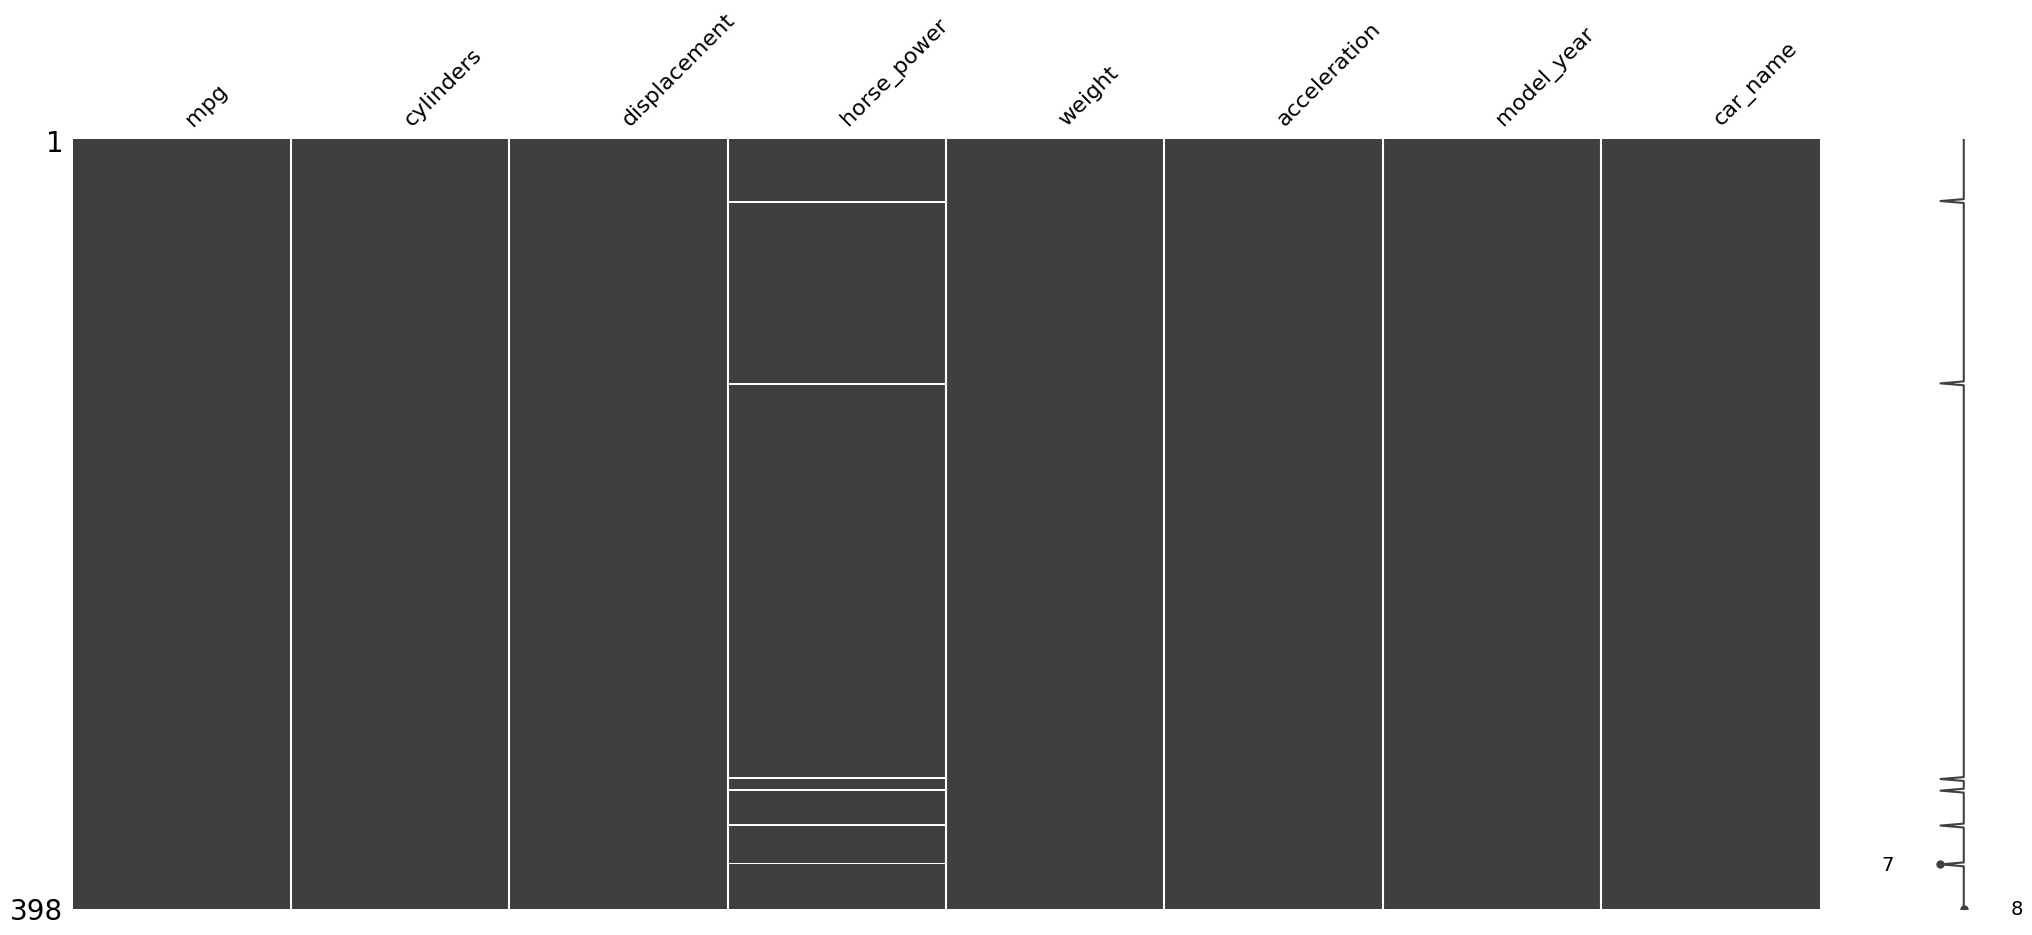

In [299]:
msno.matrix(auto)

In [300]:
auto.dropna(axis = 0, inplace = True)

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [301]:
# Your code here:
auto['cylinders'].value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [302]:
# Your code here:
auto.drop(['car_name'], axis = 1, inplace = True)


In [303]:
X_train, X_test, y_train, y_test = train_test_split(auto.drop(['mpg'], axis = 1),auto['mpg'], test_size=0.2, random_state = 42)

Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [304]:
# Your code here:

auto_model = LinearRegression()
auto_model = auto_model.fit(X_train,y_train)

# Challenge 4 - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](https://en.wikipedia.org/wiki/Coefficient_of_determination). In the end, we want the r-squared score to be as high as possible.

#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [305]:
# Your code here:

y_pred = auto_model.predict(X_train)


In [306]:
print("r2: ",r2_score(y_train, y_pred))
print("mse: ",np.sqrt(mean_squared_error(y_train, y_pred))) 
print("mae: ",mean_absolute_error(y_train, y_pred))

r2:  0.8107227953093896
mse:  3.4559142294242147
mae:  2.6691759304817206


#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [307]:
# Your code here:
y_test_pred = auto_model.predict(X_test)

In [308]:
print("r2: ",r2_score(y_test, y_test_pred))
print("mse: ",np.sqrt(mean_squared_error(y_test, y_test_pred))) 
print("mae: ",mean_absolute_error(y_test, y_test_pred))

r2:  0.7942349075428591
mse:  3.2407360783342574
mae:  2.503860089776125


#### Explaining the results

The r squared scores of the training data and the test data are pretty close (0.8146 vs 0.7818). This means our model is not overfitted. However, there is still room to improve the model fit. Move on to the next challenge.

# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [309]:
# Your code here:
X_train09, X_test09, y_train09, y_test09 = train_test_split(auto.drop(['mpg'], axis = 1),auto['mpg'], test_size=0.1, random_state = 42)

Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

In [310]:
# Your code here:
auto_model09 = LinearRegression()

In [311]:
auto_model = auto_model.fit(X_train09,y_train09)

Compute the predicted values and r squared score for our new model and new sample data.

In [312]:
# Your code here:
y_pred09 = auto_model.predict(X_train09)
print("r2: ",r2_score(y_train09, y_pred09))

r2:  0.8047940166959004


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [313]:
# Your code here:
y_test_pred09 = auto_model.predict(X_test09)
print("r2: ",r2_score(y_test09, y_test_pred09))

r2:  0.8468911998183242


0.80 vs. 0.84, r2 score improved by changing size of train and test data

# Bonus Challenge - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [314]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [315]:
# Your code here:
selector = RFE(auto_model, n_features_to_select=3)

Fit the model and print the ranking

In [316]:
# Your code here:
selector = selector.fit(auto.drop(['mpg'], axis = 1),auto['mpg'])
selector.ranking_

array([1, 2, 4, 3, 1, 1])

In [317]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horse_power', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [318]:
# Your code here:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced,  = train_test_split(auto.drop(['mpg', 'horse_power', 'displacement', 'weight'], axis = 1),auto['mpg'], test_size=0.2, random_state = 42)

Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [319]:
# Your code here: 
auto_model_reduced = LinearRegression()
auto_model_reduced = auto_model_reduced.fit(X_train_reduced,y_train_reduced)

y_pred_reduced  = auto_model_reduced.predict(X_train_reduced)
print("r2: ",r2_score(y_train_reduced, y_pred_reduced))

r2:  0.7144839092209849


In [320]:
y_test_pred_reduced = auto_model_reduced.predict(X_test_reduced)
print("r2: ",r2_score(y_test_reduced, y_test_pred_reduced))

r2:  0.7149033079956759


#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.